In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

In [3]:
# data source: https://www.kaggle.com/datasets/insiyeah/musicfeatures   
original_data = pd.read_csv('data.csv')
original_data2 = pd.read_csv('data_2genre.csv')
original_data.tail()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock
999,rock.00066.au,75.999540,36,0.360098,0.042995,2209.357588,2175.214294,4575.588999,0.107147,-245.160921,...,0.813777,-13.018359,0.053168,-8.232851,1.059255,-8.031864,-0.397097,-4.349921,-4.220998,rock


In [4]:
original_data2.tail()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
195,classical.00020.au,143.554688,69,0.269065,0.038438,1218.290508,1353.616224,2295.177788,0.069813,-300.937697,...,-1.808325,-4.104602,-2.045668,-1.596437,0.646648,1.454414,-0.221094,-1.292084,-7.100527,2
196,classical.00072.au,117.453835,57,0.279421,0.020732,1284.921775,1659.622614,2476.568358,0.063750,-360.821769,...,4.684600,3.343187,-2.251255,-1.852868,2.215029,1.784788,-1.519674,-3.253521,3.998950,2
197,classical.00061.au,151.999081,76,0.281670,0.048189,1322.026416,1590.233329,2473.626709,0.076126,-274.426858,...,-4.592368,-1.540610,-3.028737,-4.697145,-7.715005,-7.212517,-5.410751,-5.246985,-5.270150,2
198,classical.00008.au,135.999178,67,0.254774,0.034038,1516.626219,1629.500705,2973.782018,0.078788,-292.128300,...,4.709107,0.377206,1.464333,3.393674,6.076538,0.963429,-0.753660,-2.105312,0.755132,2
199,classical.00084.au,112.347147,25,0.245491,0.021982,1001.400439,1151.028078,1731.722862,0.057948,-369.184224,...,-9.797995,-5.051084,-5.084386,-3.038442,-1.718458,-1.849090,-2.257478,-1.273307,-0.441167,2


In [5]:
def f1_calc_score(y_true, y_pred):
    f1_macro = f1_score(y_true, y_pred, average='macro')
    print(f"Macro F1 Score: {f1_macro}")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    original_data.drop('label', axis=1),  # Replace 'target_column' with your actual label column name
    original_data['label'],  # Your target/label column
    test_size=0.2,  # 20% for testing, 80% for training
    random_state=42  # Setting a fixed random seed for reproducibility
)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    original_data2.drop('label', axis=1),  # Replace 'target_column' with your actual label column name
    original_data2['label'],  # Your target/label column
    test_size=0.2,  # 20% for testing, 80% for training
    random_state=42  # Setting a fixed random seed for reproducibility
)

In [143]:
performance = {'KNN':{'dataset1': 0.286, 'dataset2': 0.974},
'Gaussian Naive Bayes':{'dataset1': 0.276, 'dataset2': 0.974},
'Multinomial Naive Bayes':{'dataset1': 0.228, 'dataset2': 0.924},
'Decision Tree':{'dataset1': 0.420, 'dataset2': 0.974},
'Linear SVC':{'dataset1': 0.343, 'dataset2': 0.950},
'SVC':{'dataset1': 0.184, 'dataset2': 0.950},
'MLP':{'dataset1': 0.316, 'dataset2': 1.0},
'Random Forest':{'dataset1': 0.62, 'dataset2': 0.974},
'Gradient Boosting':{'dataset1': 0.592, 'dataset2': 0.974},
}

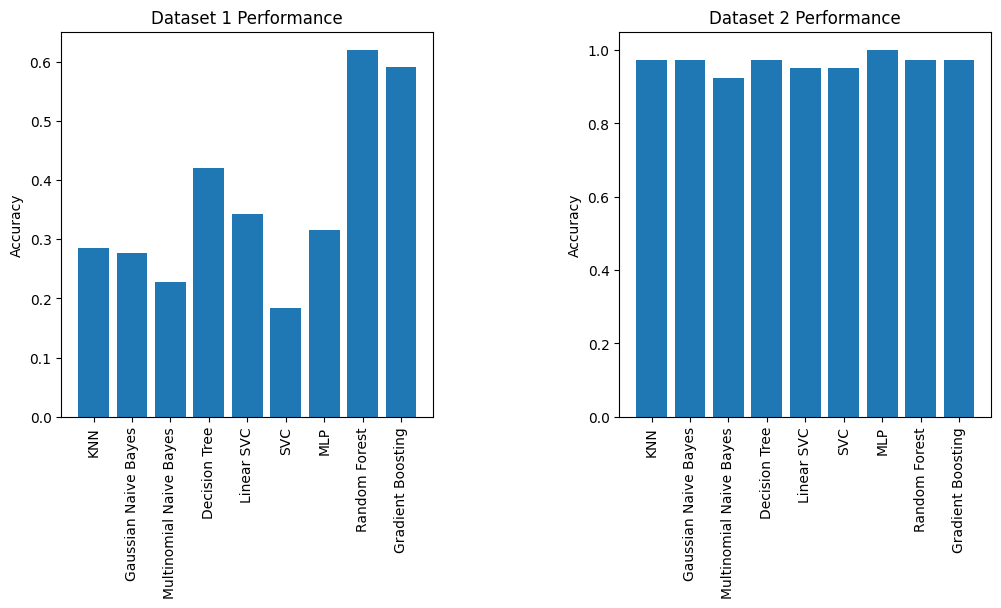

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Unpack the performance data into separate lists for each dataset
dataset1_models = list(performance.keys())
dataset1_scores = [performance[model]['dataset1'] for model in dataset1_models]

dataset2_models = list(performance.keys())
dataset2_scores = [performance[model]['dataset2'] for model in dataset2_models]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first dataset
x = np.arange(len(dataset1_models))
ax1.bar(x, dataset1_scores)
ax1.set_xticks(x)
ax1.set_xticklabels(dataset1_models, rotation=90)
ax1.set_title('Dataset 1 Performance')
ax1.set_ylabel('Accuracy')

# Plot the second dataset
x = np.arange(len(dataset2_models))
ax2.bar(x, dataset2_scores)
ax2.set_xticks(x)
ax2.set_xticklabels(dataset2_models, rotation=90)
ax2.set_title('Dataset 2 Performance')
ax2.set_ylabel('Accuracy')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()

In [138]:
i = 1
select_column = ['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
mfcc = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
if i == 1:
    x = X_train[select_column]
    test_x = X_test[select_column]
    train_y = y_train
    test_y = y_test
else:   
    x = X2_train[select_column]
    test_x = X2_test[select_column]
    train_y = y2_train
    test_y = y2_test


In [141]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.05, n_estimators=150)
gbc.fit(x, train_y)
y_pred = gbc.predict(test_x)
f1_calc_score(test_y, y_pred)

Macro F1 Score: 0.5928755645568039


In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',n_estimators=150, min_samples_split=3)
rfc.fit(x, train_y)
y_pred = rfc.predict(test_x)
f1_calc_score(test_y, y_pred)

Macro F1 Score: 0.9749843652282677


In [109]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='tanh',hidden_layer_sizes=(1000, 500, 200), max_iter=4000)
mlp.fit(x, train_y)
y_pred = mlp.predict(test_x)
f1_calc_score(test_y, y_pred)

Macro F1 Score: 0.31636966050168924


In [80]:
from sklearn.svm import LinearSVC,SVC
svc = SVC(tol=1e-5)
svc.fit(x, train_y)
y_pred = svc.predict(test_x)
f1_calc_score(test_y, y_pred)

Macro F1 Score: 0.18404051107278438


In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,criterion='gini')
tree.fit(x, train_y)
y_pred = tree.predict(test_x)
f1_calc_score(test_y, y_pred)

Macro F1 Score: 0.9749843652282677


In [32]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
clf = MultinomialNB()
clf.fit(x, train_y)
y_pred = clf.predict(test_x)
f1_calc_score(test_y, y_pred)

Macro F1 Score: 0.9245757385292269


In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y_train)
y_pred = neigh.predict(test_x)
f1_calc_score(y_test, y_pred)

Macro F1 Score: 0.28620518370518366
